In [6]:
library(reshape2)
library(ggplot2)
library(ggridges)
library(plyr)
library(dplyr)
library(Cairo)
library(matrixStats)
library(forcats)
library(hardhat)
library(grid)
library(gridExtra)
library(egg)
library(stringr)
library(cowplot)
GeomCrossbar$default_aes$lineend = 'butt'

In [7]:
data = read.csv("./Output/HRR25_orthologs_dox_screening_parsed_agg_2023-08-30DEY.csv")

In [8]:
head(data)

,ArrayGene,QueryGene,mean,n,SD
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,C.glabrata (CAGL0H03553g),C.glabrata (CAGL0H03553g),0.8241210,11,0.02914449
2,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1A1),0.8674966,11,0.03314069
3,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1A1L),0.8940396,11,0.04402071
4,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1D),0.9085575,11,0.05183176
5,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1E),0.8844831,11,0.03641463
6,C.glabrata (CAGL0H03553g),K.africana (KAFR0C02290),0.9081177,11,0.02777594


[1] "C.glabrata (CAGL0H03553g)"         "H. sapiens (CSNK1A1)"             
 [3] "H. sapiens (CSNK1A1L)"             "H. sapiens (CSNK1D)"              
 [5] "H. sapiens (CSNK1E)"               "K.africana (KAFR0C02290)"         
 [7] "K.africana (KAFR0K00320)"          "K.naganishii (KNAG0D01130)"       
 [9] "K.naganishii (KNAG0F01980)"        "N.castellii (NCAS0A01090)"        
[11] "N.castellii (NCAS0D03820)"         "N.dairenensis (NDAI0F01640)"      
[13] "N.dairenensis (NDAI0I01070)"       "S.bayanusvar.uvarum (Suva_16.102)"
[15] "S.cerevisiae (YPL204W)"            "S.kudriavzevii (Skud_16.75)"      
[17] "S.mikatae (Smik_6.409)"            "T.blattae (TBLA0A02040)"          
[19] "T.blattae (TBLA0B05310)"           "T.delbrueckii (TDEL0E05230)"      
[21] "T.phaffii (TPHA0E02830)"           "T.phaffii (TPHA0J02370)"          
[23] "V.polyspora (Kpol_1002.53)"        "V.polyspora (Kpol_1033.51)"       
[25] "Vehicle (Empty)"                   "Z.rouxii (ZYRO0G08866g)"

In [12]:
orders = read.csv("./Input/HRR25_orthologs_order.csv")

data = merge(data,orders,by=c("ArrayGene","QueryGene"))
head(data)

,ArrayGene,QueryGene,mean,n,SD,Array.MSA_order,Array_Phylo_order,Query_MSA.order,Query_Phylo_order
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,C.glabrata (CAGL0H03553g),C.glabrata (CAGL0H03553g),0.8241210,11,0.02914449,7,5,7,5
2,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1A1),0.8674966,11,0.03314069,7,5,22,23
3,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1A1L),0.8940396,11,0.04402071,7,5,24,25
4,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1D),0.9085575,11,0.05183176,7,5,23,24
5,C.glabrata (CAGL0H03553g),H. sapiens (CSNK1E),0.8844831,11,0.03641463,7,5,21,22
6,C.glabrata (CAGL0H03553g),K.africana (KAFR0C02290),0.9081177,11,0.02777594,7,5,15,11


In [25]:
max(data$mean)
min(data$mean)


[1] 0.980687

[1] 0.2975493

In [13]:
 dantheme =  theme_bw()  +  
          theme( panel.spacing = unit(2, "lines"), 
   legend.title.align = 0.5,
                          legend.key = element_blank(),
                          strip.background = element_rect(
　　　　　　　 color="#FFFFFF",fill="#FFFFFF"),
                          panel.border = element_rect(size=1.0),
                          panel.grid.minor = element_blank(),
                          panel.grid.major = element_blank(),
                          panel.background = element_blank(),
                          aspect.ratio=1.0,
                          axis.ticks = element_blank(),#element_line(color = "#000000", size = 0.5),
                          axis.text.x = element_text(color="#000000",size=9.5, angle = 90,hjust=0),
                          axis.text.x.top = element_text(vjust = 0.5),
                          axis.text.y = element_text(color="#000000",size=9.5),
                          strip.text.y = element_text(size = 9.5, color = "#000000", angle = 270), 
                          strip.text.x = element_text(size = 9.5, color = "#000000", angle = 270),
                          axis.title=element_text(size=9.5, color = "#000000")
)



In [14]:
data %>% filter(ArrayGene	=="Vehicle (Empty)")%>% filter(QueryGene	=="Vehicle (Empty)")



ArrayGene,QueryGene,mean,n,SD,Array.MSA_order,Array_Phylo_order,Query_MSA.order,Query_Phylo_order
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
Vehicle (Empty),Vehicle (Empty),0.3921669,308,0.04838432,26,26,26,26


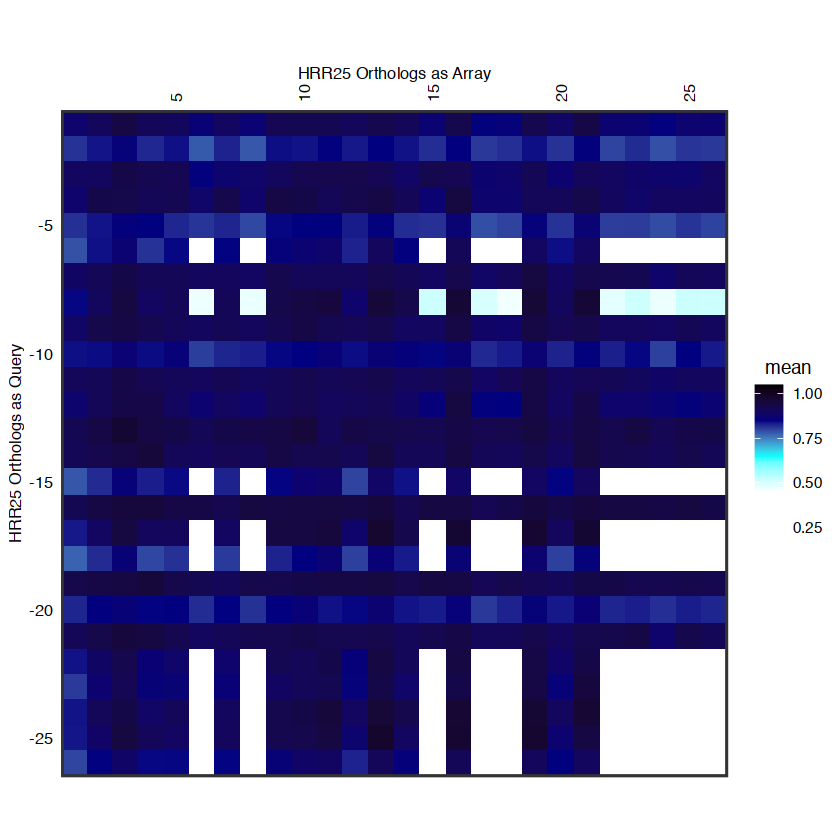

In [44]:
# Plot heatmap of relative abundance of barcodes in each condition
heatmap = ggplot(data)+   
    geom_tile(aes(Array_Phylo_order,-Query_Phylo_order,fill =mean))  +
    theme_bw()   + 
    theme( panel.spacing = unit(1, "lines"),
           legend.position='bottom',
           legend.key = element_blank(), 
           strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF"),
           panel.border = element_rect(fill=NA, colour = "black",linewidth=1),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           panel.background = element_blank(),
           aspect.ratio=1.0,
           axis.ticks = element_blank(),
           axis.text.x = element_blank(),
           #axis.text.y = element_blank()    ,
           axis.title =  element_text(size=9.5)       )+
    scale_x_continuous(expand=c(0,0),position = "top") + 
    scale_y_continuous(expand=c(0,0)) +
   scale_fill_gradientn(colors=c("#FFFFFF","#FFFFFF","#00FFFF","#000080","#000000"),na.value="#FFFFFF",limits=c(0.245,1.05 ),breaks=c(0.25,0.5,0.75,1))+
    xlab("HRR25 Orthologs as Array")+
    ylab("HRR25 Orthologs as Query")#+
   # facet_wrap(~Construct,nrow=2)
 dantheme =  theme_bw()  +  
          theme( panel.spacing = unit(2, "lines"), 
   legend.title.align = 0.5,
                          legend.key = element_blank(),
                          strip.background = element_rect(
　　　　　　　 color="#FFFFFF",fill="#FFFFFF"),
                          panel.border = element_rect(size=1.0),
                          panel.grid.minor = element_blank(),
                          panel.grid.major = element_blank(),
                          panel.background = element_blank(),
                          aspect.ratio=1.0,
                          axis.ticks = element_blank(),#element_line(color = "#000000", size = 0.5),
                          axis.text.x = element_text(color="#000000",size=9.5, angle = 90,hjust=0),
                          axis.text.x.top = element_text(vjust = 0.5),
                          axis.text.y = element_text(color="#000000",size=9.5),
                          strip.text.y = element_text(size = 9.5, color = "#000000", angle = 270), 
                          strip.text.x = element_text(size = 9.5, color = "#000000", angle = 270),
                          axis.title=element_text(size=9.5, color = "#000000")
)


heatmap+dantheme

ggsave(plot=heatmap+dantheme,"./Output/DOX_heatmap_PhyloOrder_Sel3CompScore.pdf", width=unit(8,"cm"),height=unit(8,"cm"), device = cairo_pdf)
